In [1]:
import sys
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import autoencoderV2
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, load_kabat, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH 

/home/gil/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')

h_data = parse_hydrophobicity('../data/consensus.hpb')
bulkiness_data = parse_bulkiness('../data/amino_acid_bulkiness.txt')

DATASETS = [h_data, bulkiness_data, vdw_data, charge_index_data]

ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = encode_sequences(VH_sequences, VH_LENGTH, DATASETS)
VL_encoded = encode_sequences(VL_sequences, VL_LENGTH, DATASETS)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

In [3]:
encoder, autoencoder, sess = autoencoderV2(4)

../models/RNN_autoencoder2.py:63: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge_layer = L.merge([rnn_vl, rnn_vh], concat_axis=1, mode='concat', name='merge_layer')
/home/gil/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


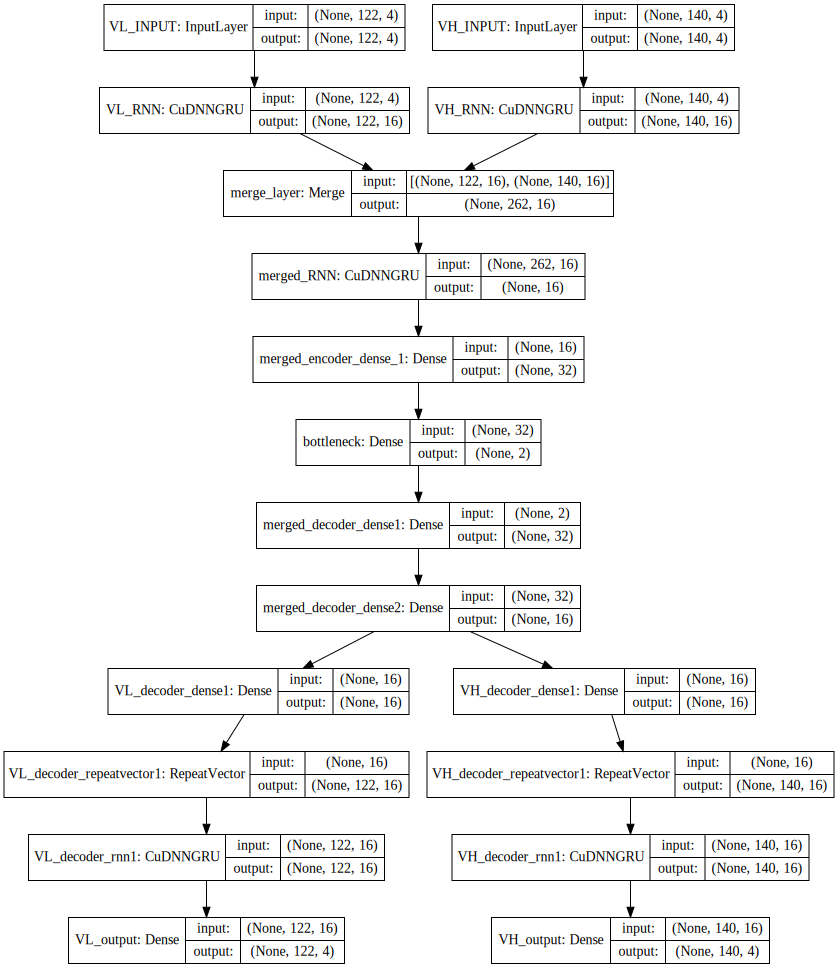

In [4]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
history = autoencoder.fit([VL_encoded_shuffled, VH_encoded_shuffled], [VL_encoded_shuffled, VH_encoded_shuffled], 
                          epochs=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint('../model_weights/autoencoderV2/run1/autoencoderV2_allfeatures.hdf5',
                                                                     save_best_only=True),
                                     keras.callbacks.TensorBoard('../logs/autoencoderV2/run1')])

Train on 1706 samples, validate on 427 samples
Epoch 1/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.9726 - VL_output_loss: 0.4537 - VH_output_loss: 0.5189 - val_loss: 0.5275 - val_VL_output_loss: 0.2607 - val_VH_output_loss: 0.2668
Epoch 2/2000
1706/1706 [==============================] - 2s 932us/step - loss: 0.5240 - VL_output_loss: 0.2595 - VH_output_loss: 0.2645 - val_loss: 0.5216 - val_VL_output_loss: 0.2583 - val_VH_output_loss: 0.2632
Epoch 3/2000
1706/1706 [==============================] - 1s 851us/step - loss: 0.5202 - VL_output_loss: 0.2574 - VH_output_loss: 0.2628 - val_loss: 0.5190 - val_VL_output_loss: 0.2568 - val_VH_output_loss: 0.2622
Epoch 4/2000
1706/1706 [==============================] - 2s 952us/step - loss: 0.5181 - VL_output_loss: 0.2562 - VH_output_loss: 0.2619 - val_loss: 0.5171 - val_VL_output_loss: 0.2557 - val_VH_output_loss: 0.2614
Epoch 5/2000
1706/1706 [==============================] - 2s 886us/step - loss: 0.5164 - VL_output_

Epoch 39/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.5040 - VL_output_loss: 0.2500 - VH_output_loss: 0.2541 - val_loss: 0.5035 - val_VL_output_loss: 0.2499 - val_VH_output_loss: 0.2536
Epoch 40/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.5037 - VL_output_loss: 0.2499 - VH_output_loss: 0.2538 - val_loss: 0.5033 - val_VL_output_loss: 0.2501 - val_VH_output_loss: 0.2532
Epoch 41/2000
1706/1706 [==============================] - 2s 902us/step - loss: 0.5033 - VL_output_loss: 0.2499 - VH_output_loss: 0.2534 - val_loss: 0.5029 - val_VL_output_loss: 0.2500 - val_VH_output_loss: 0.2528
Epoch 42/2000
1706/1706 [==============================] - 2s 936us/step - loss: 0.5028 - VL_output_loss: 0.2500 - VH_output_loss: 0.2528 - val_loss: 0.5020 - val_VL_output_loss: 0.2499 - val_VH_output_loss: 0.2521
Epoch 43/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.5018 - VL_output_loss: 0.2499 - VH_output_loss: 0.2519 - val_lo

1706/1706 [==============================] - 2s 899us/step - loss: 0.4957 - VL_output_loss: 0.2495 - VH_output_loss: 0.2462 - val_loss: 0.4947 - val_VL_output_loss: 0.2494 - val_VH_output_loss: 0.2453
Epoch 78/2000
1706/1706 [==============================] - 1s 864us/step - loss: 0.4953 - VL_output_loss: 0.2494 - VH_output_loss: 0.2459 - val_loss: 0.4947 - val_VL_output_loss: 0.2494 - val_VH_output_loss: 0.2453
Epoch 79/2000
1706/1706 [==============================] - 2s 909us/step - loss: 0.4952 - VL_output_loss: 0.2494 - VH_output_loss: 0.2458 - val_loss: 0.4943 - val_VL_output_loss: 0.2493 - val_VH_output_loss: 0.2450
Epoch 80/2000
1706/1706 [==============================] - 2s 892us/step - loss: 0.4949 - VL_output_loss: 0.2493 - VH_output_loss: 0.2456 - val_loss: 0.4940 - val_VL_output_loss: 0.2494 - val_VH_output_loss: 0.2446
Epoch 81/2000
1706/1706 [==============================] - 1s 845us/step - loss: 0.4946 - VL_output_loss: 0.2493 - VH_output_loss: 0.2453 - val_loss: 0.49

1706/1706 [==============================] - 1s 773us/step - loss: 0.4801 - VL_output_loss: 0.2457 - VH_output_loss: 0.2344 - val_loss: 0.4780 - val_VL_output_loss: 0.2441 - val_VH_output_loss: 0.2338
Epoch 116/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.4771 - VL_output_loss: 0.2434 - VH_output_loss: 0.2337 - val_loss: 0.4761 - val_VL_output_loss: 0.2429 - val_VH_output_loss: 0.2332
Epoch 117/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.4761 - VL_output_loss: 0.2429 - VH_output_loss: 0.2332 - val_loss: 0.4757 - val_VL_output_loss: 0.2429 - val_VH_output_loss: 0.2328
Epoch 118/2000
1706/1706 [==============================] - 1s 778us/step - loss: 0.4759 - VL_output_loss: 0.2428 - VH_output_loss: 0.2331 - val_loss: 0.4750 - val_VL_output_loss: 0.2427 - val_VH_output_loss: 0.2322
Epoch 119/2000
1706/1706 [==============================] - 1s 776us/step - loss: 0.4756 - VL_output_loss: 0.2427 - VH_output_loss: 0.2329 - val_loss: 

Epoch 153/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.4670 - VL_output_loss: 0.2390 - VH_output_loss: 0.2280 - val_loss: 0.4669 - val_VL_output_loss: 0.2388 - val_VH_output_loss: 0.2282
Epoch 154/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.4669 - VL_output_loss: 0.2388 - VH_output_loss: 0.2280 - val_loss: 0.4663 - val_VL_output_loss: 0.2381 - val_VH_output_loss: 0.2282
Epoch 155/2000
1706/1706 [==============================] - 1s 774us/step - loss: 0.4664 - VL_output_loss: 0.2386 - VH_output_loss: 0.2278 - val_loss: 0.4663 - val_VL_output_loss: 0.2387 - val_VH_output_loss: 0.2276
Epoch 156/2000
1706/1706 [==============================] - 1s 797us/step - loss: 0.4661 - VL_output_loss: 0.2384 - VH_output_loss: 0.2277 - val_loss: 0.4650 - val_VL_output_loss: 0.2379 - val_VH_output_loss: 0.2271
Epoch 157/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.4662 - VL_output_loss: 0.2383 - VH_output_loss: 0.22

Epoch 191/2000
1706/1706 [==============================] - 1s 784us/step - loss: 0.4600 - VL_output_loss: 0.2348 - VH_output_loss: 0.2252 - val_loss: 0.4619 - val_VL_output_loss: 0.2359 - val_VH_output_loss: 0.2260
Epoch 192/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.4597 - VL_output_loss: 0.2347 - VH_output_loss: 0.2249 - val_loss: 0.4587 - val_VL_output_loss: 0.2343 - val_VH_output_loss: 0.2245
Epoch 193/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.4596 - VL_output_loss: 0.2347 - VH_output_loss: 0.2249 - val_loss: 0.4586 - val_VL_output_loss: 0.2341 - val_VH_output_loss: 0.2245
Epoch 194/2000
1706/1706 [==============================] - 1s 776us/step - loss: 0.4595 - VL_output_loss: 0.2346 - VH_output_loss: 0.2249 - val_loss: 0.4608 - val_VL_output_loss: 0.2347 - val_VH_output_loss: 0.2262
Epoch 195/2000
1706/1706 [==============================] - 1s 783us/step - loss: 0.4593 - VL_output_loss: 0.2345 - VH_output_loss: 0.22

Epoch 229/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.4531 - VL_output_loss: 0.2323 - VH_output_loss: 0.2209 - val_loss: 0.4534 - val_VL_output_loss: 0.2329 - val_VH_output_loss: 0.2206
Epoch 230/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.4524 - VL_output_loss: 0.2318 - VH_output_loss: 0.2207 - val_loss: 0.4516 - val_VL_output_loss: 0.2311 - val_VH_output_loss: 0.2205
Epoch 231/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.4518 - VL_output_loss: 0.2314 - VH_output_loss: 0.2204 - val_loss: 0.4522 - val_VL_output_loss: 0.2318 - val_VH_output_loss: 0.2204
Epoch 232/2000
1706/1706 [==============================] - 1s 802us/step - loss: 0.4523 - VL_output_loss: 0.2319 - VH_output_loss: 0.2204 - val_loss: 0.4520 - val_VL_output_loss: 0.2315 - val_VH_output_loss: 0.2205
Epoch 233/2000
1706/1706 [==============================] - 1s 775us/step - loss: 0.4517 - VL_output_loss: 0.2316 - VH_output_loss: 0.22

Epoch 267/2000
1706/1706 [==============================] - 1s 776us/step - loss: 0.4440 - VL_output_loss: 0.2299 - VH_output_loss: 0.2141 - val_loss: 0.4444 - val_VL_output_loss: 0.2294 - val_VH_output_loss: 0.2150
Epoch 268/2000
1706/1706 [==============================] - 1s 791us/step - loss: 0.4441 - VL_output_loss: 0.2297 - VH_output_loss: 0.2145 - val_loss: 0.4436 - val_VL_output_loss: 0.2295 - val_VH_output_loss: 0.2141
Epoch 269/2000
1706/1706 [==============================] - 2s 951us/step - loss: 0.4435 - VL_output_loss: 0.2296 - VH_output_loss: 0.2139 - val_loss: 0.4463 - val_VL_output_loss: 0.2292 - val_VH_output_loss: 0.2170
Epoch 270/2000
1706/1706 [==============================] - 2s 910us/step - loss: 0.4443 - VL_output_loss: 0.2296 - VH_output_loss: 0.2147 - val_loss: 0.4435 - val_VL_output_loss: 0.2294 - val_VH_output_loss: 0.2141
Epoch 271/2000
1706/1706 [==============================] - 1s 831us/step - loss: 0.4435 - VL_output_loss: 0.2301 - VH_output_loss: 0.21

Epoch 305/2000
1706/1706 [==============================] - 1s 861us/step - loss: 0.4321 - VL_output_loss: 0.2208 - VH_output_loss: 0.2113 - val_loss: 0.4362 - val_VL_output_loss: 0.2232 - val_VH_output_loss: 0.2129
Epoch 306/2000
1706/1706 [==============================] - 2s 911us/step - loss: 0.4315 - VL_output_loss: 0.2206 - VH_output_loss: 0.2109 - val_loss: 0.4328 - val_VL_output_loss: 0.2216 - val_VH_output_loss: 0.2112
Epoch 307/2000
1706/1706 [==============================] - 1s 878us/step - loss: 0.4318 - VL_output_loss: 0.2207 - VH_output_loss: 0.2111 - val_loss: 0.4335 - val_VL_output_loss: 0.2222 - val_VH_output_loss: 0.2113
Epoch 308/2000
1706/1706 [==============================] - 1s 870us/step - loss: 0.4318 - VL_output_loss: 0.2207 - VH_output_loss: 0.2111 - val_loss: 0.4348 - val_VL_output_loss: 0.2226 - val_VH_output_loss: 0.2121
Epoch 309/2000
1706/1706 [==============================] - 1s 823us/step - loss: 0.4315 - VL_output_loss: 0.2211 - VH_output_loss: 0.21

Epoch 343/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.4257 - VL_output_loss: 0.2174 - VH_output_loss: 0.2083 - val_loss: 0.4274 - val_VL_output_loss: 0.2182 - val_VH_output_loss: 0.2093
Epoch 344/2000
1706/1706 [==============================] - 1s 796us/step - loss: 0.4248 - VL_output_loss: 0.2165 - VH_output_loss: 0.2083 - val_loss: 0.4275 - val_VL_output_loss: 0.2181 - val_VH_output_loss: 0.2094
Epoch 345/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4244 - VL_output_loss: 0.2165 - VH_output_loss: 0.2079 - val_loss: 0.4291 - val_VL_output_loss: 0.2185 - val_VH_output_loss: 0.2106
Epoch 346/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4256 - VL_output_loss: 0.2171 - VH_output_loss: 0.2084 - val_loss: 0.4277 - val_VL_output_loss: 0.2183 - val_VH_output_loss: 0.2093
Epoch 347/2000
1706/1706 [==============================] - 2s 963us/step - loss: 0.4244 - VL_output_loss: 0.2165 - VH_output_loss: 0.2079 -

Epoch 381/2000
1706/1706 [==============================] - 1s 785us/step - loss: 0.4181 - VL_output_loss: 0.2114 - VH_output_loss: 0.2067 - val_loss: 0.4215 - val_VL_output_loss: 0.2129 - val_VH_output_loss: 0.2086
Epoch 382/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.4177 - VL_output_loss: 0.2112 - VH_output_loss: 0.2065 - val_loss: 0.4241 - val_VL_output_loss: 0.2143 - val_VH_output_loss: 0.2098
Epoch 383/2000
1706/1706 [==============================] - 1s 778us/step - loss: 0.4182 - VL_output_loss: 0.2117 - VH_output_loss: 0.2065 - val_loss: 0.4220 - val_VL_output_loss: 0.2136 - val_VH_output_loss: 0.2083
Epoch 384/2000
1706/1706 [==============================] - 1s 783us/step - loss: 0.4181 - VL_output_loss: 0.2118 - VH_output_loss: 0.2063 - val_loss: 0.4232 - val_VL_output_loss: 0.2124 - val_VH_output_loss: 0.2107
Epoch 385/2000
1706/1706 [==============================] - 1s 774us/step - loss: 0.4188 - VL_output_loss: 0.2119 - VH_output_loss: 0.20

Epoch 419/2000
1706/1706 [==============================] - 1s 770us/step - loss: 0.4133 - VL_output_loss: 0.2085 - VH_output_loss: 0.2048 - val_loss: 0.4186 - val_VL_output_loss: 0.2121 - val_VH_output_loss: 0.2065
Epoch 420/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.4135 - VL_output_loss: 0.2088 - VH_output_loss: 0.2047 - val_loss: 0.4161 - val_VL_output_loss: 0.2099 - val_VH_output_loss: 0.2062
Epoch 421/2000
1706/1706 [==============================] - 1s 789us/step - loss: 0.4134 - VL_output_loss: 0.2092 - VH_output_loss: 0.2042 - val_loss: 0.4166 - val_VL_output_loss: 0.2104 - val_VH_output_loss: 0.2062
Epoch 422/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.4129 - VL_output_loss: 0.2085 - VH_output_loss: 0.2044 - val_loss: 0.4167 - val_VL_output_loss: 0.2102 - val_VH_output_loss: 0.2065
Epoch 423/2000
1706/1706 [==============================] - 1s 776us/step - loss: 0.4126 - VL_output_loss: 0.2081 - VH_output_loss: 0.20

Epoch 457/2000
1706/1706 [==============================] - 1s 774us/step - loss: 0.4082 - VL_output_loss: 0.2063 - VH_output_loss: 0.2019 - val_loss: 0.4131 - val_VL_output_loss: 0.2077 - val_VH_output_loss: 0.2054
Epoch 458/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.4087 - VL_output_loss: 0.2066 - VH_output_loss: 0.2021 - val_loss: 0.4140 - val_VL_output_loss: 0.2097 - val_VH_output_loss: 0.2043
Epoch 459/2000
1706/1706 [==============================] - 1s 780us/step - loss: 0.4091 - VL_output_loss: 0.2067 - VH_output_loss: 0.2024 - val_loss: 0.4117 - val_VL_output_loss: 0.2077 - val_VH_output_loss: 0.2041
Epoch 460/2000
1706/1706 [==============================] - 1s 791us/step - loss: 0.4090 - VL_output_loss: 0.2071 - VH_output_loss: 0.2019 - val_loss: 0.4119 - val_VL_output_loss: 0.2082 - val_VH_output_loss: 0.2037
Epoch 461/2000
1706/1706 [==============================] - 1s 774us/step - loss: 0.4082 - VL_output_loss: 0.2062 - VH_output_loss: 0.20

Epoch 495/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.4024 - VL_output_loss: 0.2030 - VH_output_loss: 0.1994 - val_loss: 0.4071 - val_VL_output_loss: 0.2044 - val_VH_output_loss: 0.2027
Epoch 496/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.4040 - VL_output_loss: 0.2038 - VH_output_loss: 0.2002 - val_loss: 0.4105 - val_VL_output_loss: 0.2047 - val_VH_output_loss: 0.2058
Epoch 497/2000
1706/1706 [==============================] - 1s 784us/step - loss: 0.4020 - VL_output_loss: 0.2025 - VH_output_loss: 0.1995 - val_loss: 0.4077 - val_VL_output_loss: 0.2050 - val_VH_output_loss: 0.2027
Epoch 498/2000
1706/1706 [==============================] - 1s 778us/step - loss: 0.4015 - VL_output_loss: 0.2020 - VH_output_loss: 0.1995 - val_loss: 0.4066 - val_VL_output_loss: 0.2042 - val_VH_output_loss: 0.2024
Epoch 499/2000
1706/1706 [==============================] - 1s 780us/step - loss: 0.4027 - VL_output_loss: 0.2034 - VH_output_loss: 0.19

Epoch 533/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.3975 - VL_output_loss: 0.1997 - VH_output_loss: 0.1978 - val_loss: 0.4031 - val_VL_output_loss: 0.2018 - val_VH_output_loss: 0.2013
Epoch 534/2000
1706/1706 [==============================] - 1s 771us/step - loss: 0.3979 - VL_output_loss: 0.2008 - VH_output_loss: 0.1971 - val_loss: 0.4084 - val_VL_output_loss: 0.2073 - val_VH_output_loss: 0.2011
Epoch 535/2000
1706/1706 [==============================] - 1s 772us/step - loss: 0.3971 - VL_output_loss: 0.2000 - VH_output_loss: 0.1971 - val_loss: 0.4051 - val_VL_output_loss: 0.2035 - val_VH_output_loss: 0.2016
Epoch 536/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.3991 - VL_output_loss: 0.2016 - VH_output_loss: 0.1975 - val_loss: 0.4038 - val_VL_output_loss: 0.2023 - val_VH_output_loss: 0.2015
Epoch 537/2000
1706/1706 [==============================] - 1s 816us/step - loss: 0.3969 - VL_output_loss: 0.1997 - VH_output_loss: 0.19

Epoch 571/2000
1706/1706 [==============================] - 1s 766us/step - loss: 0.3931 - VL_output_loss: 0.1967 - VH_output_loss: 0.1963 - val_loss: 0.3982 - val_VL_output_loss: 0.1986 - val_VH_output_loss: 0.1997
Epoch 572/2000
1706/1706 [==============================] - 1s 780us/step - loss: 0.3938 - VL_output_loss: 0.1977 - VH_output_loss: 0.1962 - val_loss: 0.4001 - val_VL_output_loss: 0.1993 - val_VH_output_loss: 0.2007
Epoch 573/2000
1706/1706 [==============================] - 1s 771us/step - loss: 0.3949 - VL_output_loss: 0.1985 - VH_output_loss: 0.1964 - val_loss: 0.4028 - val_VL_output_loss: 0.2033 - val_VH_output_loss: 0.1995
Epoch 574/2000
1706/1706 [==============================] - 2s 889us/step - loss: 0.3949 - VL_output_loss: 0.1992 - VH_output_loss: 0.1957 - val_loss: 0.3996 - val_VL_output_loss: 0.1990 - val_VH_output_loss: 0.2005
Epoch 575/2000
1706/1706 [==============================] - 2s 882us/step - loss: 0.3929 - VL_output_loss: 0.1968 - VH_output_loss: 0.19

Epoch 609/2000
1706/1706 [==============================] - 1s 793us/step - loss: 0.3910 - VL_output_loss: 0.1966 - VH_output_loss: 0.1944 - val_loss: 0.3954 - val_VL_output_loss: 0.1966 - val_VH_output_loss: 0.1988
Epoch 610/2000
1706/1706 [==============================] - 1s 776us/step - loss: 0.3907 - VL_output_loss: 0.1957 - VH_output_loss: 0.1950 - val_loss: 0.3947 - val_VL_output_loss: 0.1968 - val_VH_output_loss: 0.1979
Epoch 611/2000
1706/1706 [==============================] - 1s 767us/step - loss: 0.3897 - VL_output_loss: 0.1955 - VH_output_loss: 0.1942 - val_loss: 0.3949 - val_VL_output_loss: 0.1970 - val_VH_output_loss: 0.1978
Epoch 612/2000
1706/1706 [==============================] - 1s 752us/step - loss: 0.3897 - VL_output_loss: 0.1959 - VH_output_loss: 0.1937 - val_loss: 0.3971 - val_VL_output_loss: 0.1976 - val_VH_output_loss: 0.1995
Epoch 613/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.3908 - VL_output_loss: 0.1969 - VH_output_loss: 0.19

Epoch 647/2000
1706/1706 [==============================] - 1s 796us/step - loss: 0.3870 - VL_output_loss: 0.1942 - VH_output_loss: 0.1928 - val_loss: 0.3967 - val_VL_output_loss: 0.1969 - val_VH_output_loss: 0.1998
Epoch 648/2000
1706/1706 [==============================] - 1s 795us/step - loss: 0.3883 - VL_output_loss: 0.1945 - VH_output_loss: 0.1938 - val_loss: 0.3928 - val_VL_output_loss: 0.1956 - val_VH_output_loss: 0.1972
Epoch 649/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.3881 - VL_output_loss: 0.1951 - VH_output_loss: 0.1930 - val_loss: 0.3952 - val_VL_output_loss: 0.1964 - val_VH_output_loss: 0.1988
Epoch 650/2000
1706/1706 [==============================] - 1s 780us/step - loss: 0.3862 - VL_output_loss: 0.1933 - VH_output_loss: 0.1929 - val_loss: 0.3920 - val_VL_output_loss: 0.1952 - val_VH_output_loss: 0.1968
Epoch 651/2000
1706/1706 [==============================] - 1s 775us/step - loss: 0.3875 - VL_output_loss: 0.1945 - VH_output_loss: 0.19

Epoch 685/2000
1706/1706 [==============================] - 1s 775us/step - loss: 0.3859 - VL_output_loss: 0.1938 - VH_output_loss: 0.1920 - val_loss: 0.3896 - val_VL_output_loss: 0.1928 - val_VH_output_loss: 0.1968
Epoch 686/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.3834 - VL_output_loss: 0.1919 - VH_output_loss: 0.1915 - val_loss: 0.3890 - val_VL_output_loss: 0.1920 - val_VH_output_loss: 0.1970
Epoch 687/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.3841 - VL_output_loss: 0.1920 - VH_output_loss: 0.1921 - val_loss: 0.3906 - val_VL_output_loss: 0.1941 - val_VH_output_loss: 0.1965
Epoch 688/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.3833 - VL_output_loss: 0.1916 - VH_output_loss: 0.1917 - val_loss: 0.3905 - val_VL_output_loss: 0.1924 - val_VH_output_loss: 0.1982
Epoch 689/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3838 - VL_output_loss: 0.1920 - VH_output_loss: 0.19

Epoch 723/2000
1706/1706 [==============================] - 1s 792us/step - loss: 0.3835 - VL_output_loss: 0.1929 - VH_output_loss: 0.1906 - val_loss: 0.3890 - val_VL_output_loss: 0.1937 - val_VH_output_loss: 0.1953
Epoch 724/2000
1706/1706 [==============================] - 1s 784us/step - loss: 0.3817 - VL_output_loss: 0.1903 - VH_output_loss: 0.1913 - val_loss: 0.3945 - val_VL_output_loss: 0.1992 - val_VH_output_loss: 0.1953
Epoch 725/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.3837 - VL_output_loss: 0.1928 - VH_output_loss: 0.1909 - val_loss: 0.3861 - val_VL_output_loss: 0.1909 - val_VH_output_loss: 0.1952
Epoch 726/2000
1706/1706 [==============================] - 1s 795us/step - loss: 0.3799 - VL_output_loss: 0.1895 - VH_output_loss: 0.1904 - val_loss: 0.3864 - val_VL_output_loss: 0.1901 - val_VH_output_loss: 0.1962
Epoch 727/2000
1706/1706 [==============================] - 1s 780us/step - loss: 0.3803 - VL_output_loss: 0.1894 - VH_output_loss: 0.19

Epoch 761/2000
1706/1706 [==============================] - 1s 792us/step - loss: 0.3782 - VL_output_loss: 0.1880 - VH_output_loss: 0.1902 - val_loss: 0.3874 - val_VL_output_loss: 0.1916 - val_VH_output_loss: 0.1959
Epoch 762/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.3797 - VL_output_loss: 0.1892 - VH_output_loss: 0.1905 - val_loss: 0.3914 - val_VL_output_loss: 0.1950 - val_VH_output_loss: 0.1965
Epoch 763/2000
1706/1706 [==============================] - 1s 792us/step - loss: 0.3789 - VL_output_loss: 0.1884 - VH_output_loss: 0.1905 - val_loss: 0.3864 - val_VL_output_loss: 0.1909 - val_VH_output_loss: 0.1955
Epoch 764/2000
1706/1706 [==============================] - 1s 780us/step - loss: 0.3798 - VL_output_loss: 0.1893 - VH_output_loss: 0.1904 - val_loss: 0.3849 - val_VL_output_loss: 0.1890 - val_VH_output_loss: 0.1959
Epoch 765/2000
1706/1706 [==============================] - 1s 783us/step - loss: 0.3780 - VL_output_loss: 0.1880 - VH_output_loss: 0.19

Epoch 799/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.3763 - VL_output_loss: 0.1868 - VH_output_loss: 0.1895 - val_loss: 0.3844 - val_VL_output_loss: 0.1898 - val_VH_output_loss: 0.1946
Epoch 800/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.3753 - VL_output_loss: 0.1861 - VH_output_loss: 0.1892 - val_loss: 0.3808 - val_VL_output_loss: 0.1866 - val_VH_output_loss: 0.1942
Epoch 801/2000
1706/1706 [==============================] - 1s 790us/step - loss: 0.3761 - VL_output_loss: 0.1865 - VH_output_loss: 0.1896 - val_loss: 0.3911 - val_VL_output_loss: 0.1928 - val_VH_output_loss: 0.1983
Epoch 802/2000
1706/1706 [==============================] - 1s 794us/step - loss: 0.3775 - VL_output_loss: 0.1872 - VH_output_loss: 0.1903 - val_loss: 0.3831 - val_VL_output_loss: 0.1878 - val_VH_output_loss: 0.1953
Epoch 803/2000
1706/1706 [==============================] - 1s 765us/step - loss: 0.3770 - VL_output_loss: 0.1878 - VH_output_loss: 0.18

Epoch 837/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.3750 - VL_output_loss: 0.1852 - VH_output_loss: 0.1898 - val_loss: 0.3785 - val_VL_output_loss: 0.1850 - val_VH_output_loss: 0.1935
Epoch 838/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.3720 - VL_output_loss: 0.1836 - VH_output_loss: 0.1885 - val_loss: 0.3871 - val_VL_output_loss: 0.1931 - val_VH_output_loss: 0.1940
Epoch 839/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.3750 - VL_output_loss: 0.1859 - VH_output_loss: 0.1892 - val_loss: 0.3788 - val_VL_output_loss: 0.1839 - val_VH_output_loss: 0.1950
Epoch 840/2000
1706/1706 [==============================] - 1s 784us/step - loss: 0.3739 - VL_output_loss: 0.1850 - VH_output_loss: 0.1888 - val_loss: 0.3788 - val_VL_output_loss: 0.1853 - val_VH_output_loss: 0.1935
Epoch 841/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.3735 - VL_output_loss: 0.1849 - VH_output_loss: 0.18

Epoch 875/2000
1706/1706 [==============================] - 1s 795us/step - loss: 0.3736 - VL_output_loss: 0.1851 - VH_output_loss: 0.1885 - val_loss: 0.3807 - val_VL_output_loss: 0.1865 - val_VH_output_loss: 0.1942
Epoch 876/2000
1706/1706 [==============================] - 1s 784us/step - loss: 0.3717 - VL_output_loss: 0.1830 - VH_output_loss: 0.1887 - val_loss: 0.3768 - val_VL_output_loss: 0.1829 - val_VH_output_loss: 0.1939
Epoch 877/2000
1706/1706 [==============================] - 1s 774us/step - loss: 0.3703 - VL_output_loss: 0.1823 - VH_output_loss: 0.1880 - val_loss: 0.3752 - val_VL_output_loss: 0.1818 - val_VH_output_loss: 0.1934
Epoch 878/2000
1706/1706 [==============================] - 1s 791us/step - loss: 0.3694 - VL_output_loss: 0.1812 - VH_output_loss: 0.1883 - val_loss: 0.3793 - val_VL_output_loss: 0.1866 - val_VH_output_loss: 0.1928
Epoch 879/2000
1706/1706 [==============================] - 1s 783us/step - loss: 0.3712 - VL_output_loss: 0.1827 - VH_output_loss: 0.18

Epoch 913/2000
1706/1706 [==============================] - 1s 771us/step - loss: 0.3710 - VL_output_loss: 0.1833 - VH_output_loss: 0.1878 - val_loss: 0.3806 - val_VL_output_loss: 0.1872 - val_VH_output_loss: 0.1935
Epoch 914/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.3692 - VL_output_loss: 0.1811 - VH_output_loss: 0.1880 - val_loss: 0.3732 - val_VL_output_loss: 0.1804 - val_VH_output_loss: 0.1928
Epoch 915/2000
1706/1706 [==============================] - 1s 803us/step - loss: 0.3682 - VL_output_loss: 0.1805 - VH_output_loss: 0.1877 - val_loss: 0.3766 - val_VL_output_loss: 0.1840 - val_VH_output_loss: 0.1925
Epoch 916/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.3688 - VL_output_loss: 0.1812 - VH_output_loss: 0.1876 - val_loss: 0.3747 - val_VL_output_loss: 0.1812 - val_VH_output_loss: 0.1934
Epoch 917/2000
1706/1706 [==============================] - 1s 771us/step - loss: 0.3691 - VL_output_loss: 0.1814 - VH_output_loss: 0.18

Epoch 951/2000
1706/1706 [==============================] - 1s 779us/step - loss: 0.3661 - VL_output_loss: 0.1791 - VH_output_loss: 0.1870 - val_loss: 0.3731 - val_VL_output_loss: 0.1801 - val_VH_output_loss: 0.1930
Epoch 952/2000
1706/1706 [==============================] - 1s 771us/step - loss: 0.3675 - VL_output_loss: 0.1805 - VH_output_loss: 0.1870 - val_loss: 0.3745 - val_VL_output_loss: 0.1800 - val_VH_output_loss: 0.1945
Epoch 953/2000
1706/1706 [==============================] - 1s 791us/step - loss: 0.3669 - VL_output_loss: 0.1791 - VH_output_loss: 0.1877 - val_loss: 0.3773 - val_VL_output_loss: 0.1842 - val_VH_output_loss: 0.1932
Epoch 954/2000
1706/1706 [==============================] - 1s 790us/step - loss: 0.3656 - VL_output_loss: 0.1782 - VH_output_loss: 0.1874 - val_loss: 0.3718 - val_VL_output_loss: 0.1790 - val_VH_output_loss: 0.1927
Epoch 955/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.3662 - VL_output_loss: 0.1793 - VH_output_loss: 0.18

Epoch 989/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3642 - VL_output_loss: 0.1779 - VH_output_loss: 0.1863 - val_loss: 0.3723 - val_VL_output_loss: 0.1791 - val_VH_output_loss: 0.1931
Epoch 990/2000
1706/1706 [==============================] - 1s 773us/step - loss: 0.3642 - VL_output_loss: 0.1777 - VH_output_loss: 0.1865 - val_loss: 0.3690 - val_VL_output_loss: 0.1772 - val_VH_output_loss: 0.1919
Epoch 991/2000
1706/1706 [==============================] - 1s 772us/step - loss: 0.3633 - VL_output_loss: 0.1771 - VH_output_loss: 0.1863 - val_loss: 0.3715 - val_VL_output_loss: 0.1780 - val_VH_output_loss: 0.1935
Epoch 992/2000
1706/1706 [==============================] - 1s 776us/step - loss: 0.3704 - VL_output_loss: 0.1834 - VH_output_loss: 0.1870 - val_loss: 0.3726 - val_VL_output_loss: 0.1803 - val_VH_output_loss: 0.1923
Epoch 993/2000
1706/1706 [==============================] - 1s 761us/step - loss: 0.3661 - VL_output_loss: 0.1796 - VH_output_loss: 0.18

Epoch 1027/2000
1706/1706 [==============================] - 1s 826us/step - loss: 0.3624 - VL_output_loss: 0.1760 - VH_output_loss: 0.1864 - val_loss: 0.3695 - val_VL_output_loss: 0.1785 - val_VH_output_loss: 0.1910
Epoch 1028/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.3628 - VL_output_loss: 0.1768 - VH_output_loss: 0.1860 - val_loss: 0.3687 - val_VL_output_loss: 0.1777 - val_VH_output_loss: 0.1910
Epoch 1029/2000
1706/1706 [==============================] - 1s 779us/step - loss: 0.3630 - VL_output_loss: 0.1770 - VH_output_loss: 0.1860 - val_loss: 0.3702 - val_VL_output_loss: 0.1788 - val_VH_output_loss: 0.1914
Epoch 1030/2000
1706/1706 [==============================] - 1s 778us/step - loss: 0.3637 - VL_output_loss: 0.1781 - VH_output_loss: 0.1856 - val_loss: 0.3747 - val_VL_output_loss: 0.1832 - val_VH_output_loss: 0.1915
Epoch 1031/2000
1706/1706 [==============================] - 1s 801us/step - loss: 0.3668 - VL_output_loss: 0.1809 - VH_output_loss:

Epoch 1065/2000
1706/1706 [==============================] - 1s 793us/step - loss: 0.3642 - VL_output_loss: 0.1789 - VH_output_loss: 0.1853 - val_loss: 0.3700 - val_VL_output_loss: 0.1778 - val_VH_output_loss: 0.1923
Epoch 1066/2000
1706/1706 [==============================] - 1s 766us/step - loss: 0.3598 - VL_output_loss: 0.1746 - VH_output_loss: 0.1852 - val_loss: 0.3699 - val_VL_output_loss: 0.1783 - val_VH_output_loss: 0.1915
Epoch 1067/2000
1706/1706 [==============================] - 1s 779us/step - loss: 0.3593 - VL_output_loss: 0.1740 - VH_output_loss: 0.1853 - val_loss: 0.3682 - val_VL_output_loss: 0.1745 - val_VH_output_loss: 0.1937
Epoch 1068/2000
1706/1706 [==============================] - 1s 775us/step - loss: 0.3614 - VL_output_loss: 0.1746 - VH_output_loss: 0.1869 - val_loss: 0.3679 - val_VL_output_loss: 0.1753 - val_VH_output_loss: 0.1925
Epoch 1069/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.3618 - VL_output_loss: 0.1750 - VH_output_loss:

Epoch 1103/2000
1706/1706 [==============================] - 1s 797us/step - loss: 0.3618 - VL_output_loss: 0.1759 - VH_output_loss: 0.1859 - val_loss: 0.3690 - val_VL_output_loss: 0.1763 - val_VH_output_loss: 0.1927
Epoch 1104/2000
1706/1706 [==============================] - 1s 785us/step - loss: 0.3602 - VL_output_loss: 0.1742 - VH_output_loss: 0.1859 - val_loss: 0.3680 - val_VL_output_loss: 0.1776 - val_VH_output_loss: 0.1904
Epoch 1105/2000
1706/1706 [==============================] - 1s 773us/step - loss: 0.3585 - VL_output_loss: 0.1738 - VH_output_loss: 0.1846 - val_loss: 0.3755 - val_VL_output_loss: 0.1833 - val_VH_output_loss: 0.1922
Epoch 1106/2000
1706/1706 [==============================] - 1s 776us/step - loss: 0.3614 - VL_output_loss: 0.1762 - VH_output_loss: 0.1852 - val_loss: 0.3666 - val_VL_output_loss: 0.1761 - val_VH_output_loss: 0.1905
Epoch 1107/2000
1706/1706 [==============================] - 1s 779us/step - loss: 0.3587 - VL_output_loss: 0.1735 - VH_output_loss:

Epoch 1141/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3579 - VL_output_loss: 0.1733 - VH_output_loss: 0.1846 - val_loss: 0.3659 - val_VL_output_loss: 0.1749 - val_VH_output_loss: 0.1910
Epoch 1142/2000
1706/1706 [==============================] - 1s 804us/step - loss: 0.3594 - VL_output_loss: 0.1738 - VH_output_loss: 0.1856 - val_loss: 0.3663 - val_VL_output_loss: 0.1762 - val_VH_output_loss: 0.1902
Epoch 1143/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3582 - VL_output_loss: 0.1731 - VH_output_loss: 0.1852 - val_loss: 0.3764 - val_VL_output_loss: 0.1839 - val_VH_output_loss: 0.1925
Epoch 1144/2000
1706/1706 [==============================] - 1s 774us/step - loss: 0.3584 - VL_output_loss: 0.1731 - VH_output_loss: 0.1853 - val_loss: 0.3669 - val_VL_output_loss: 0.1760 - val_VH_output_loss: 0.1909
Epoch 1145/2000
1706/1706 [==============================] - 1s 793us/step - loss: 0.3566 - VL_output_loss: 0.1723 - VH_output_loss:

Epoch 1179/2000
1706/1706 [==============================] - 1s 784us/step - loss: 0.3557 - VL_output_loss: 0.1714 - VH_output_loss: 0.1843 - val_loss: 0.3663 - val_VL_output_loss: 0.1761 - val_VH_output_loss: 0.1902
Epoch 1180/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.3571 - VL_output_loss: 0.1729 - VH_output_loss: 0.1842 - val_loss: 0.3627 - val_VL_output_loss: 0.1724 - val_VH_output_loss: 0.1903
Epoch 1181/2000
1706/1706 [==============================] - 1s 774us/step - loss: 0.3581 - VL_output_loss: 0.1734 - VH_output_loss: 0.1846 - val_loss: 0.3701 - val_VL_output_loss: 0.1800 - val_VH_output_loss: 0.1901
Epoch 1182/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3572 - VL_output_loss: 0.1730 - VH_output_loss: 0.1843 - val_loss: 0.3671 - val_VL_output_loss: 0.1745 - val_VH_output_loss: 0.1925
Epoch 1183/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3589 - VL_output_loss: 0.1744 - VH_output_loss:

Epoch 1217/2000
1706/1706 [==============================] - 1s 798us/step - loss: 0.3543 - VL_output_loss: 0.1704 - VH_output_loss: 0.1839 - val_loss: 0.3621 - val_VL_output_loss: 0.1709 - val_VH_output_loss: 0.1913
Epoch 1218/2000
1706/1706 [==============================] - 1s 771us/step - loss: 0.3586 - VL_output_loss: 0.1741 - VH_output_loss: 0.1846 - val_loss: 0.3652 - val_VL_output_loss: 0.1727 - val_VH_output_loss: 0.1925
Epoch 1219/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.3552 - VL_output_loss: 0.1709 - VH_output_loss: 0.1843 - val_loss: 0.3608 - val_VL_output_loss: 0.1709 - val_VH_output_loss: 0.1899
Epoch 1220/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3546 - VL_output_loss: 0.1709 - VH_output_loss: 0.1837 - val_loss: 0.3618 - val_VL_output_loss: 0.1721 - val_VH_output_loss: 0.1898
Epoch 1221/2000
1706/1706 [==============================] - 1s 783us/step - loss: 0.3539 - VL_output_loss: 0.1704 - VH_output_loss:

1706/1706 [==============================] - 1s 769us/step - loss: 0.3522 - VL_output_loss: 0.1687 - VH_output_loss: 0.1835 - val_loss: 0.3594 - val_VL_output_loss: 0.1699 - val_VH_output_loss: 0.1894
Epoch 1255/2000
1706/1706 [==============================] - 1s 792us/step - loss: 0.3535 - VL_output_loss: 0.1701 - VH_output_loss: 0.1833 - val_loss: 0.3683 - val_VL_output_loss: 0.1774 - val_VH_output_loss: 0.1909
Epoch 1256/2000
1706/1706 [==============================] - 1s 778us/step - loss: 0.3534 - VL_output_loss: 0.1695 - VH_output_loss: 0.1839 - val_loss: 0.3640 - val_VL_output_loss: 0.1744 - val_VH_output_loss: 0.1897
Epoch 1257/2000
1706/1706 [==============================] - 1s 779us/step - loss: 0.3536 - VL_output_loss: 0.1698 - VH_output_loss: 0.1838 - val_loss: 0.3620 - val_VL_output_loss: 0.1724 - val_VH_output_loss: 0.1895
Epoch 1258/2000
1706/1706 [==============================] - 1s 796us/step - loss: 0.3551 - VL_output_loss: 0.1715 - VH_output_loss: 0.1837 - val_lo

Epoch 1292/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.3515 - VL_output_loss: 0.1675 - VH_output_loss: 0.1840 - val_loss: 0.3607 - val_VL_output_loss: 0.1702 - val_VH_output_loss: 0.1905
Epoch 1293/2000
1706/1706 [==============================] - 1s 789us/step - loss: 0.3545 - VL_output_loss: 0.1714 - VH_output_loss: 0.1831 - val_loss: 0.3616 - val_VL_output_loss: 0.1710 - val_VH_output_loss: 0.1906
Epoch 1294/2000
1706/1706 [==============================] - 1s 774us/step - loss: 0.3546 - VL_output_loss: 0.1698 - VH_output_loss: 0.1847 - val_loss: 0.3613 - val_VL_output_loss: 0.1717 - val_VH_output_loss: 0.1896
Epoch 1295/2000
1706/1706 [==============================] - 1s 784us/step - loss: 0.3536 - VL_output_loss: 0.1697 - VH_output_loss: 0.1839 - val_loss: 0.3608 - val_VL_output_loss: 0.1710 - val_VH_output_loss: 0.1898
Epoch 1296/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.3505 - VL_output_loss: 0.1669 - VH_output_loss:

Epoch 1330/2000
1706/1706 [==============================] - 1s 792us/step - loss: 0.3493 - VL_output_loss: 0.1665 - VH_output_loss: 0.1829 - val_loss: 0.3588 - val_VL_output_loss: 0.1699 - val_VH_output_loss: 0.1889
Epoch 1331/2000
1706/1706 [==============================] - 2s 899us/step - loss: 0.3515 - VL_output_loss: 0.1689 - VH_output_loss: 0.1826 - val_loss: 0.3573 - val_VL_output_loss: 0.1681 - val_VH_output_loss: 0.1892
Epoch 1332/2000
1706/1706 [==============================] - 1s 817us/step - loss: 0.3501 - VL_output_loss: 0.1668 - VH_output_loss: 0.1833 - val_loss: 0.3635 - val_VL_output_loss: 0.1742 - val_VH_output_loss: 0.1893
Epoch 1333/2000
1706/1706 [==============================] - 2s 951us/step - loss: 0.3513 - VL_output_loss: 0.1681 - VH_output_loss: 0.1833 - val_loss: 0.3571 - val_VL_output_loss: 0.1679 - val_VH_output_loss: 0.1892
Epoch 1334/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.3498 - VL_output_loss: 0.1671 - VH_output_loss: 0

Epoch 1368/2000
1706/1706 [==============================] - 1s 784us/step - loss: 0.3483 - VL_output_loss: 0.1649 - VH_output_loss: 0.1834 - val_loss: 0.3602 - val_VL_output_loss: 0.1691 - val_VH_output_loss: 0.1911
Epoch 1369/2000
1706/1706 [==============================] - 1s 771us/step - loss: 0.3492 - VL_output_loss: 0.1654 - VH_output_loss: 0.1838 - val_loss: 0.3608 - val_VL_output_loss: 0.1703 - val_VH_output_loss: 0.1905
Epoch 1370/2000
1706/1706 [==============================] - 1s 769us/step - loss: 0.3478 - VL_output_loss: 0.1653 - VH_output_loss: 0.1825 - val_loss: 0.3595 - val_VL_output_loss: 0.1692 - val_VH_output_loss: 0.1902
Epoch 1371/2000
1706/1706 [==============================] - 1s 790us/step - loss: 0.3492 - VL_output_loss: 0.1647 - VH_output_loss: 0.1845 - val_loss: 0.3578 - val_VL_output_loss: 0.1671 - val_VH_output_loss: 0.1907
Epoch 1372/2000
1706/1706 [==============================] - 1s 769us/step - loss: 0.3502 - VL_output_loss: 0.1672 - VH_output_loss:

Epoch 1406/2000
1706/1706 [==============================] - 1s 778us/step - loss: 0.3502 - VL_output_loss: 0.1681 - VH_output_loss: 0.1821 - val_loss: 0.3566 - val_VL_output_loss: 0.1680 - val_VH_output_loss: 0.1886
Epoch 1407/2000
1706/1706 [==============================] - 1s 779us/step - loss: 0.3474 - VL_output_loss: 0.1650 - VH_output_loss: 0.1824 - val_loss: 0.3544 - val_VL_output_loss: 0.1662 - val_VH_output_loss: 0.1882
Epoch 1408/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.3464 - VL_output_loss: 0.1644 - VH_output_loss: 0.1820 - val_loss: 0.3554 - val_VL_output_loss: 0.1669 - val_VH_output_loss: 0.1885
Epoch 1409/2000
1706/1706 [==============================] - 1s 796us/step - loss: 0.3478 - VL_output_loss: 0.1660 - VH_output_loss: 0.1818 - val_loss: 0.3705 - val_VL_output_loss: 0.1805 - val_VH_output_loss: 0.1899
Epoch 1410/2000
1706/1706 [==============================] - 1s 833us/step - loss: 0.3492 - VL_output_loss: 0.1668 - VH_output_loss:

Epoch 1444/2000
1706/1706 [==============================] - 1s 874us/step - loss: 0.3464 - VL_output_loss: 0.1641 - VH_output_loss: 0.1823 - val_loss: 0.3560 - val_VL_output_loss: 0.1661 - val_VH_output_loss: 0.1899
Epoch 1445/2000
1706/1706 [==============================] - 2s 965us/step - loss: 0.3472 - VL_output_loss: 0.1637 - VH_output_loss: 0.1835 - val_loss: 0.3577 - val_VL_output_loss: 0.1681 - val_VH_output_loss: 0.1896
Epoch 1446/2000
1706/1706 [==============================] - 2s 967us/step - loss: 0.3487 - VL_output_loss: 0.1658 - VH_output_loss: 0.1829 - val_loss: 0.3553 - val_VL_output_loss: 0.1672 - val_VH_output_loss: 0.1881
Epoch 1447/2000
1706/1706 [==============================] - 2s 902us/step - loss: 0.3453 - VL_output_loss: 0.1632 - VH_output_loss: 0.1821 - val_loss: 0.3547 - val_VL_output_loss: 0.1665 - val_VH_output_loss: 0.1882
Epoch 1448/2000
1706/1706 [==============================] - 1s 860us/step - loss: 0.3461 - VL_output_loss: 0.1646 - VH_output_loss:

Epoch 1482/2000
1706/1706 [==============================] - 1s 776us/step - loss: 0.3488 - VL_output_loss: 0.1639 - VH_output_loss: 0.1849 - val_loss: 0.3589 - val_VL_output_loss: 0.1698 - val_VH_output_loss: 0.1891
Epoch 1483/2000
1706/1706 [==============================] - 1s 773us/step - loss: 0.3477 - VL_output_loss: 0.1657 - VH_output_loss: 0.1821 - val_loss: 0.3635 - val_VL_output_loss: 0.1751 - val_VH_output_loss: 0.1884
Epoch 1484/2000
1706/1706 [==============================] - 1s 778us/step - loss: 0.3461 - VL_output_loss: 0.1645 - VH_output_loss: 0.1815 - val_loss: 0.3544 - val_VL_output_loss: 0.1660 - val_VH_output_loss: 0.1884
Epoch 1485/2000
1706/1706 [==============================] - 1s 785us/step - loss: 0.3470 - VL_output_loss: 0.1658 - VH_output_loss: 0.1812 - val_loss: 0.3561 - val_VL_output_loss: 0.1683 - val_VH_output_loss: 0.1878
Epoch 1486/2000
1706/1706 [==============================] - 1s 767us/step - loss: 0.3480 - VL_output_loss: 0.1666 - VH_output_loss:

Epoch 1520/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.3448 - VL_output_loss: 0.1627 - VH_output_loss: 0.1821 - val_loss: 0.3547 - val_VL_output_loss: 0.1663 - val_VH_output_loss: 0.1884
Epoch 1521/2000
1706/1706 [==============================] - 1s 794us/step - loss: 0.3453 - VL_output_loss: 0.1645 - VH_output_loss: 0.1808 - val_loss: 0.3549 - val_VL_output_loss: 0.1664 - val_VH_output_loss: 0.1885
Epoch 1522/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.3488 - VL_output_loss: 0.1659 - VH_output_loss: 0.1829 - val_loss: 0.3628 - val_VL_output_loss: 0.1699 - val_VH_output_loss: 0.1929
Epoch 1523/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.3467 - VL_output_loss: 0.1622 - VH_output_loss: 0.1845 - val_loss: 0.3542 - val_VL_output_loss: 0.1645 - val_VH_output_loss: 0.1896
Epoch 1524/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.3441 - VL_output_loss: 0.1617 - VH_output_loss:

Epoch 1558/2000
1706/1706 [==============================] - 1s 790us/step - loss: 0.3479 - VL_output_loss: 0.1673 - VH_output_loss: 0.1807 - val_loss: 0.3518 - val_VL_output_loss: 0.1638 - val_VH_output_loss: 0.1880
Epoch 1559/2000
1706/1706 [==============================] - 1s 797us/step - loss: 0.3418 - VL_output_loss: 0.1611 - VH_output_loss: 0.1807 - val_loss: 0.3519 - val_VL_output_loss: 0.1640 - val_VH_output_loss: 0.1879
Epoch 1560/2000
1706/1706 [==============================] - 1s 779us/step - loss: 0.3440 - VL_output_loss: 0.1620 - VH_output_loss: 0.1820 - val_loss: 0.3533 - val_VL_output_loss: 0.1642 - val_VH_output_loss: 0.1891
Epoch 1561/2000
1706/1706 [==============================] - 2s 922us/step - loss: 0.3456 - VL_output_loss: 0.1625 - VH_output_loss: 0.1831 - val_loss: 0.3521 - val_VL_output_loss: 0.1641 - val_VH_output_loss: 0.1880
Epoch 1562/2000
1706/1706 [==============================] - 1s 854us/step - loss: 0.3433 - VL_output_loss: 0.1610 - VH_output_loss:

Epoch 1596/2000
1706/1706 [==============================] - 1s 798us/step - loss: 0.3443 - VL_output_loss: 0.1634 - VH_output_loss: 0.1810 - val_loss: 0.3601 - val_VL_output_loss: 0.1714 - val_VH_output_loss: 0.1887
Epoch 1597/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3445 - VL_output_loss: 0.1633 - VH_output_loss: 0.1812 - val_loss: 0.3508 - val_VL_output_loss: 0.1638 - val_VH_output_loss: 0.1871
Epoch 1598/2000
1706/1706 [==============================] - 1s 817us/step - loss: 0.3426 - VL_output_loss: 0.1614 - VH_output_loss: 0.1812 - val_loss: 0.3526 - val_VL_output_loss: 0.1649 - val_VH_output_loss: 0.1877
Epoch 1599/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.3443 - VL_output_loss: 0.1631 - VH_output_loss: 0.1812 - val_loss: 0.3598 - val_VL_output_loss: 0.1721 - val_VH_output_loss: 0.1878
Epoch 1600/2000
1706/1706 [==============================] - 1s 766us/step - loss: 0.3429 - VL_output_loss: 0.1619 - VH_output_loss:

Epoch 1634/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.3478 - VL_output_loss: 0.1668 - VH_output_loss: 0.1811 - val_loss: 0.3514 - val_VL_output_loss: 0.1637 - val_VH_output_loss: 0.1877
Epoch 1635/2000
1706/1706 [==============================] - 1s 797us/step - loss: 0.3438 - VL_output_loss: 0.1629 - VH_output_loss: 0.1810 - val_loss: 0.3506 - val_VL_output_loss: 0.1633 - val_VH_output_loss: 0.1874
Epoch 1636/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.3419 - VL_output_loss: 0.1619 - VH_output_loss: 0.1800 - val_loss: 0.3656 - val_VL_output_loss: 0.1786 - val_VH_output_loss: 0.1871
Epoch 1637/2000
1706/1706 [==============================] - 1s 789us/step - loss: 0.3462 - VL_output_loss: 0.1656 - VH_output_loss: 0.1806 - val_loss: 0.3515 - val_VL_output_loss: 0.1646 - val_VH_output_loss: 0.1869
Epoch 1638/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3436 - VL_output_loss: 0.1623 - VH_output_loss:

Epoch 1672/2000
1706/1706 [==============================] - 2s 906us/step - loss: 0.3419 - VL_output_loss: 0.1614 - VH_output_loss: 0.1805 - val_loss: 0.3516 - val_VL_output_loss: 0.1629 - val_VH_output_loss: 0.1887
Epoch 1673/2000
1706/1706 [==============================] - 2s 889us/step - loss: 0.3428 - VL_output_loss: 0.1618 - VH_output_loss: 0.1810 - val_loss: 0.3524 - val_VL_output_loss: 0.1638 - val_VH_output_loss: 0.1885
Epoch 1674/2000
1706/1706 [==============================] - 1s 824us/step - loss: 0.3409 - VL_output_loss: 0.1607 - VH_output_loss: 0.1803 - val_loss: 0.3494 - val_VL_output_loss: 0.1625 - val_VH_output_loss: 0.1869
Epoch 1675/2000
1706/1706 [==============================] - 1s 791us/step - loss: 0.3420 - VL_output_loss: 0.1617 - VH_output_loss: 0.1803 - val_loss: 0.3522 - val_VL_output_loss: 0.1637 - val_VH_output_loss: 0.1885
Epoch 1676/2000
1706/1706 [==============================] - 1s 799us/step - loss: 0.3470 - VL_output_loss: 0.1649 - VH_output_loss:

Epoch 1710/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.3491 - VL_output_loss: 0.1686 - VH_output_loss: 0.1806 - val_loss: 0.3563 - val_VL_output_loss: 0.1676 - val_VH_output_loss: 0.1887
Epoch 1711/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.3460 - VL_output_loss: 0.1653 - VH_output_loss: 0.1806 - val_loss: 0.3544 - val_VL_output_loss: 0.1671 - val_VH_output_loss: 0.1873
Epoch 1712/2000
1706/1706 [==============================] - 1s 775us/step - loss: 0.3479 - VL_output_loss: 0.1672 - VH_output_loss: 0.1807 - val_loss: 0.3576 - val_VL_output_loss: 0.1666 - val_VH_output_loss: 0.1911
Epoch 1713/2000
1706/1706 [==============================] - 2s 915us/step - loss: 0.3484 - VL_output_loss: 0.1662 - VH_output_loss: 0.1822 - val_loss: 0.3657 - val_VL_output_loss: 0.1794 - val_VH_output_loss: 0.1863
Epoch 1714/2000
1706/1706 [==============================] - 2s 895us/step - loss: 0.3492 - VL_output_loss: 0.1680 - VH_output_loss:

Epoch 1748/2000
1706/1706 [==============================] - 1s 791us/step - loss: 0.3462 - VL_output_loss: 0.1659 - VH_output_loss: 0.1803 - val_loss: 0.3545 - val_VL_output_loss: 0.1678 - val_VH_output_loss: 0.1866
Epoch 1749/2000
1706/1706 [==============================] - 1s 784us/step - loss: 0.3452 - VL_output_loss: 0.1655 - VH_output_loss: 0.1797 - val_loss: 0.3491 - val_VL_output_loss: 0.1634 - val_VH_output_loss: 0.1857
Epoch 1750/2000
1706/1706 [==============================] - 1s 795us/step - loss: 0.3415 - VL_output_loss: 0.1617 - VH_output_loss: 0.1798 - val_loss: 0.3493 - val_VL_output_loss: 0.1628 - val_VH_output_loss: 0.1865
Epoch 1751/2000
1706/1706 [==============================] - 1s 791us/step - loss: 0.3437 - VL_output_loss: 0.1634 - VH_output_loss: 0.1803 - val_loss: 0.3672 - val_VL_output_loss: 0.1807 - val_VH_output_loss: 0.1865
Epoch 1752/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.3458 - VL_output_loss: 0.1655 - VH_output_loss:

Epoch 1786/2000
1706/1706 [==============================] - 1s 781us/step - loss: 0.3405 - VL_output_loss: 0.1616 - VH_output_loss: 0.1790 - val_loss: 0.3496 - val_VL_output_loss: 0.1628 - val_VH_output_loss: 0.1868
Epoch 1787/2000
1706/1706 [==============================] - 1s 808us/step - loss: 0.3411 - VL_output_loss: 0.1619 - VH_output_loss: 0.1791 - val_loss: 0.3493 - val_VL_output_loss: 0.1624 - val_VH_output_loss: 0.1869
Epoch 1788/2000
1706/1706 [==============================] - 1s 791us/step - loss: 0.3408 - VL_output_loss: 0.1603 - VH_output_loss: 0.1805 - val_loss: 0.3487 - val_VL_output_loss: 0.1628 - val_VH_output_loss: 0.1859
Epoch 1789/2000
1706/1706 [==============================] - 1s 785us/step - loss: 0.3406 - VL_output_loss: 0.1613 - VH_output_loss: 0.1792 - val_loss: 0.3499 - val_VL_output_loss: 0.1637 - val_VH_output_loss: 0.1862
Epoch 1790/2000
1706/1706 [==============================] - 1s 785us/step - loss: 0.3435 - VL_output_loss: 0.1635 - VH_output_loss:

Epoch 1824/2000
1706/1706 [==============================] - 1s 793us/step - loss: 0.3394 - VL_output_loss: 0.1602 - VH_output_loss: 0.1792 - val_loss: 0.3486 - val_VL_output_loss: 0.1612 - val_VH_output_loss: 0.1874
Epoch 1825/2000
1706/1706 [==============================] - 1s 826us/step - loss: 0.3404 - VL_output_loss: 0.1608 - VH_output_loss: 0.1796 - val_loss: 0.3493 - val_VL_output_loss: 0.1634 - val_VH_output_loss: 0.1859
Epoch 1826/2000
1706/1706 [==============================] - 2s 943us/step - loss: 0.3406 - VL_output_loss: 0.1617 - VH_output_loss: 0.1790 - val_loss: 0.3570 - val_VL_output_loss: 0.1698 - val_VH_output_loss: 0.1873
Epoch 1827/2000
1706/1706 [==============================] - 2s 944us/step - loss: 0.3420 - VL_output_loss: 0.1625 - VH_output_loss: 0.1795 - val_loss: 0.3502 - val_VL_output_loss: 0.1626 - val_VH_output_loss: 0.1876
Epoch 1828/2000
1706/1706 [==============================] - 1s 792us/step - loss: 0.3416 - VL_output_loss: 0.1621 - VH_output_loss:

Epoch 1862/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3393 - VL_output_loss: 0.1604 - VH_output_loss: 0.1789 - val_loss: 0.3484 - val_VL_output_loss: 0.1625 - val_VH_output_loss: 0.1859
Epoch 1863/2000
1706/1706 [==============================] - 1s 785us/step - loss: 0.3393 - VL_output_loss: 0.1608 - VH_output_loss: 0.1785 - val_loss: 0.3476 - val_VL_output_loss: 0.1620 - val_VH_output_loss: 0.1856
Epoch 1864/2000
1706/1706 [==============================] - 1s 788us/step - loss: 0.3406 - VL_output_loss: 0.1617 - VH_output_loss: 0.1788 - val_loss: 0.3493 - val_VL_output_loss: 0.1630 - val_VH_output_loss: 0.1863
Epoch 1865/2000
1706/1706 [==============================] - 1s 776us/step - loss: 0.3480 - VL_output_loss: 0.1651 - VH_output_loss: 0.1829 - val_loss: 0.3565 - val_VL_output_loss: 0.1621 - val_VH_output_loss: 0.1944
Epoch 1866/2000
1706/1706 [==============================] - 1s 780us/step - loss: 0.3421 - VL_output_loss: 0.1599 - VH_output_loss:

Epoch 1900/2000
1706/1706 [==============================] - 1s 832us/step - loss: 0.3414 - VL_output_loss: 0.1617 - VH_output_loss: 0.1797 - val_loss: 0.3496 - val_VL_output_loss: 0.1644 - val_VH_output_loss: 0.1852
Epoch 1901/2000
1706/1706 [==============================] - 1s 793us/step - loss: 0.3449 - VL_output_loss: 0.1654 - VH_output_loss: 0.1795 - val_loss: 0.3490 - val_VL_output_loss: 0.1620 - val_VH_output_loss: 0.1870
Epoch 1902/2000
1706/1706 [==============================] - 1s 770us/step - loss: 0.3396 - VL_output_loss: 0.1609 - VH_output_loss: 0.1787 - val_loss: 0.3475 - val_VL_output_loss: 0.1619 - val_VH_output_loss: 0.1856
Epoch 1903/2000
1706/1706 [==============================] - 1s 790us/step - loss: 0.3400 - VL_output_loss: 0.1615 - VH_output_loss: 0.1785 - val_loss: 0.3479 - val_VL_output_loss: 0.1618 - val_VH_output_loss: 0.1861
Epoch 1904/2000
1706/1706 [==============================] - 1s 787us/step - loss: 0.3423 - VL_output_loss: 0.1626 - VH_output_loss:

Epoch 1938/2000
1706/1706 [==============================] - 1s 785us/step - loss: 0.3406 - VL_output_loss: 0.1602 - VH_output_loss: 0.1804 - val_loss: 0.3473 - val_VL_output_loss: 0.1613 - val_VH_output_loss: 0.1859
Epoch 1939/2000
1706/1706 [==============================] - 1s 795us/step - loss: 0.3414 - VL_output_loss: 0.1626 - VH_output_loss: 0.1788 - val_loss: 0.3510 - val_VL_output_loss: 0.1649 - val_VH_output_loss: 0.1861
Epoch 1940/2000
1706/1706 [==============================] - 1s 778us/step - loss: 0.3411 - VL_output_loss: 0.1624 - VH_output_loss: 0.1787 - val_loss: 0.3519 - val_VL_output_loss: 0.1660 - val_VH_output_loss: 0.1859
Epoch 1941/2000
1706/1706 [==============================] - 1s 793us/step - loss: 0.3403 - VL_output_loss: 0.1614 - VH_output_loss: 0.1789 - val_loss: 0.3475 - val_VL_output_loss: 0.1622 - val_VH_output_loss: 0.1853
Epoch 1942/2000
1706/1706 [==============================] - 1s 782us/step - loss: 0.3370 - VL_output_loss: 0.1590 - VH_output_loss:

Epoch 1976/2000
1706/1706 [==============================] - 1s 777us/step - loss: 0.3371 - VL_output_loss: 0.1588 - VH_output_loss: 0.1782 - val_loss: 0.3454 - val_VL_output_loss: 0.1603 - val_VH_output_loss: 0.1851
Epoch 1977/2000
1706/1706 [==============================] - 1s 853us/step - loss: 0.3386 - VL_output_loss: 0.1602 - VH_output_loss: 0.1784 - val_loss: 0.3484 - val_VL_output_loss: 0.1633 - val_VH_output_loss: 0.1850
Epoch 1978/2000
1706/1706 [==============================] - 2s 916us/step - loss: 0.3372 - VL_output_loss: 0.1588 - VH_output_loss: 0.1784 - val_loss: 0.3469 - val_VL_output_loss: 0.1618 - val_VH_output_loss: 0.1852
Epoch 1979/2000
1706/1706 [==============================] - 1s 801us/step - loss: 0.3373 - VL_output_loss: 0.1592 - VH_output_loss: 0.1781 - val_loss: 0.3476 - val_VL_output_loss: 0.1612 - val_VH_output_loss: 0.1864
Epoch 1980/2000
1706/1706 [==============================] - 1s 867us/step - loss: 0.3373 - VL_output_loss: 0.1593 - VH_output_loss:

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

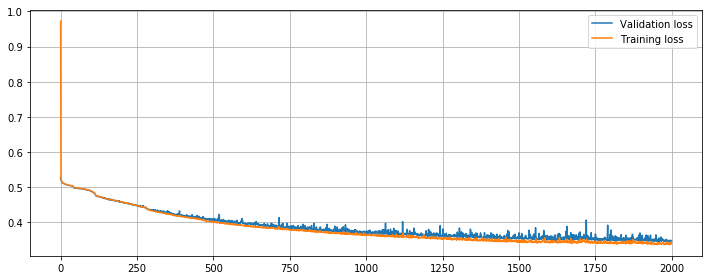

In [7]:
plt.figure(figsize=(10,4))
plt.plot(autoencoder.history.history['val_loss'], label='Validation loss')
plt.plot(autoencoder.history.history['loss'], label='Training loss')
plt.legend()
plt.grid()
plt.tight_layout()

In [8]:
autoencoder.load_weights('../model_weights/autoencoderV2/run1/autoencoderV2_allfeatures.hdf5')

In [9]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [10]:
code = encoder.predict([VL_encoded, VH_encoded])

le = LabelEncoder().fit(animals_mask)
labels = le.transform(animals_mask)

unique_labels = np.unique(labels)

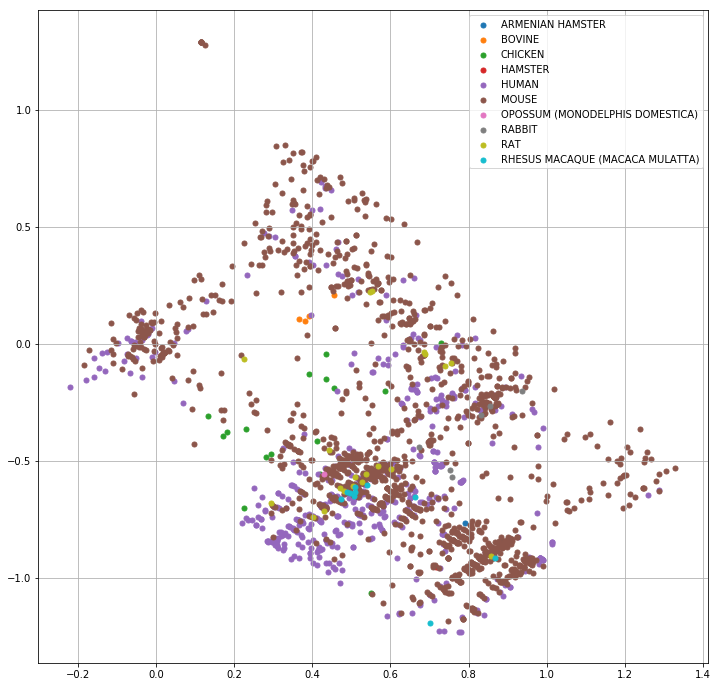

In [11]:
plt.figure(figsize=(12,12))
for x in range(unique_labels.size):
    mask_labels = labels == unique_labels[x]
    plt.scatter(code[mask_labels,0], code[mask_labels,1], marker='.', label=le.classes_[x], s=100)
plt.legend()
plt.grid()

In [12]:
from abpytools import FabCollection, ChainCollection
import pandas as pd

combinations = pd.read_csv('/home/gil/PhD/UCB/precollection/random_pairs.txt', index_col=0, delimiter=', ')

heavy_chains = ChainCollection(path='/home/gil/PhD/UCB/CombinationData/AbFiles/heavy_chains.json')
heavy_chains.load()
light_chains = ChainCollection(path='/home/gil/PhD/UCB/CombinationData/AbFiles/light_chains.json')
light_chains.load()

heavy_chains_list=[]
light_chains_list=[]

for heavy, light in  combinations['Random Pairs'].str.split('-'):
    heavy_chains_list.append(heavy_chains.get_object(heavy))
    light_chains_list.append(light_chains.get_object(light))    
    
fab_collection = FabCollection(None, heavy_chains_list, light_chains_list,
                               names=['P' + str(x) for x in combinations.index.tolist()])

Loading in antibody objects


/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list


In [13]:
data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

VL_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Light'].values]
VH_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Heavy'].values]

VH_data_encoded = encode_sequences(VH_data, VH_LENGTH, DATASETS)
VL_data_encoded = encode_sequences(VL_data, VL_LENGTH, DATASETS)

VH_data_encoded = ss_VH.transform(VH_data_encoded)
VL_data_encoded = ss_VL.transform(VL_data_encoded)

code_1 = encoder.predict([VL_data_encoded, VH_data_encoded])

latent_data = pd.DataFrame(code_1, columns=['Latent1', 'Latent2'], index=fab_collection.names)

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

data.dropna(axis=0, inplace=True, subset=[data.columns[0]])

data = data.join(latent_data)

data.head()

,Tm D - Mean,Tm D - Std. Error,Tm2 - Mean,Tm2 - Std. Error,Latent1,Latent2
P2,64.473820,0.000000,NaN,NaN,0.804638,-1.048961
P3,73.982970,0.130358,NaN,NaN,0.738965,-1.049426
P4,64.326010,0.060344,NaN,NaN,0.547525,-0.830724
P6,74.192370,0.036953,NaN,NaN,0.470269,-0.609453
P9,72.899025,0.085337,NaN,NaN,0.376642,-0.634582


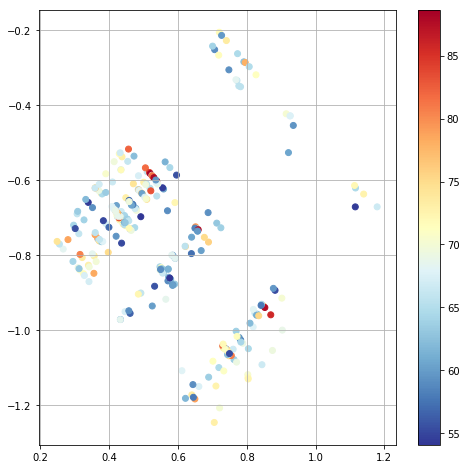

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
plt.colorbar()
plt.grid()

In [15]:
from sklearn.cluster import KMeans

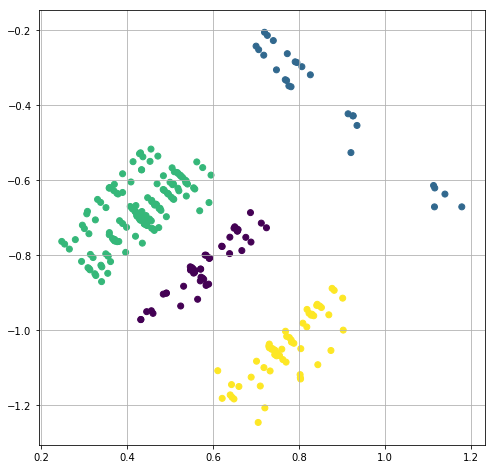

In [25]:
N_CLUSTERS = 4

kmeans = KMeans(N_CLUSTERS, init='random', random_state=45)
kmeans.fit(data[['Latent1','Latent2']])
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=kmeans.labels_)
plt.grid()

DEBUG:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/gil/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


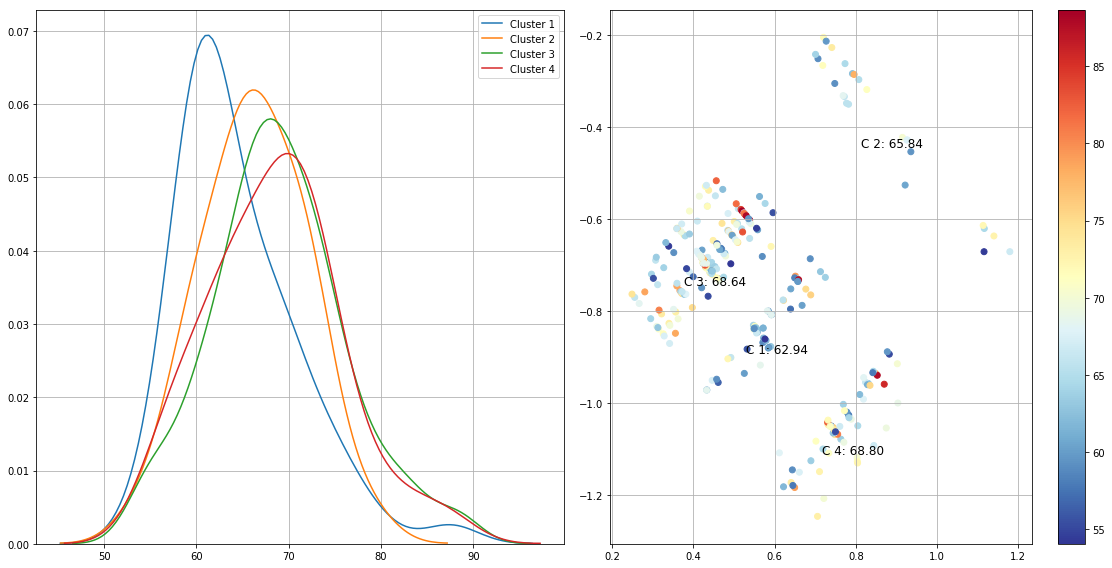

In [26]:
f, ax = plt.subplots(1,2,figsize=(16,8))
kmeans_labels = kmeans.predict(data[['Latent1','Latent2']]) 
tms = ax[1].scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
for x in range(N_CLUSTERS):
    ax[1].text(kmeans.cluster_centers_[x][0]-.05, kmeans.cluster_centers_[x][1]-.06,
               'C {}: {:.2f}'.format(x+1, np.median(data.values[kmeans_labels==x, 0])), fontsize=12)
cbar = f.colorbar(tms)
ax[1].grid()
for x in range(N_CLUSTERS):
    sns.distplot(data.values[kmeans_labels==x, 0], ax=ax[0], hist=False, label='Cluster {}'.format(x+1))
ax[0].legend()
ax[0].grid()
#     print(data.values[kmeans_labels==x, 0].mean(), data.values[kmeans_labels==x, 0].std())
plt.tight_layout()